In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

plt.style.use('tableau-colorblind10')

# 한글 폰트 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'Malgun Gothic' 

In [2]:
pd.__version__, np.__version__, mpl.__version__

('2.2.3', '1.26.4', '3.9.2')

In [3]:
MAX_YEAR = 10


colors = [
    '#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00'
] * 2
contrast_colors = [
    colors[0], colors[0], colors[1], colors[1]
] * 2
bins = [0, 31, 92, 182, 273, 365, 365*2, 365*3, 365*4, 365*5, 365*MAX_YEAR]
labels = ['0-1mo', '1-3mo', '3-6mo', '6-9mo', '9-12mo', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5yr+']

# ECOS

In [6]:
ecos = pd.read_csv('data/시장금리(일별)_15021512.csv')
ecos = ecos.melt(id_vars=["계정항목"], var_name="date", value_name="yield")

ecos["date"] = pd.to_datetime(ecos["date"], errors="coerce")
ecos = ecos.dropna(subset=["date"])

for c in ecos.columns[1:]:
    lower_limit = ecos[c].quantile(0.01)  # 하위 1%
    upper_limit = ecos[c].quantile(0.99)  # 상위 99%
    ecos[c]= ecos[c].clip(lower=lower_limit, upper=upper_limit)

ecos = ecos.pivot_table(index="date", columns="계정항목", values="yield")
ecos = ecos.reset_index().sort_index()
ecos.set_index('date', drop=True, inplace=True)
print(ecos.columns)
ecos

C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\1697917266.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ecos["date"] = pd.to_datetime(ecos["date"], errors="coerce")


Index(['CD(91일)', '국고채(10년)', '국고채(1년)', '국고채(20년)', '국고채(30년)', '국고채(3년)',
       '국고채(5년)'],
      dtype='object', name='계정항목')


계정항목,CD(91일),국고채(10년),국고채(1년),국고채(20년),국고채(30년),국고채(3년),국고채(5년)
date,,,,,,,
2006-03-09,4.208723,5.428723,4.596383,5.617333,NaN,4.949362,5.162979
2006-03-10,4.27,5.31,4.56,5.59,NaN,4.88,5.04
2006-03-13,4.27,5.4,4.58,5.67,NaN,4.94,5.13
2006-03-14,4.27,5.38,4.57,5.66,NaN,4.91,5.11
2006-03-15,4.27,5.37,4.56,5.65,NaN,4.88,5.09
...,...,...,...,...,...,...,...
2024-08-28,3.52,3.054,3.049,3.059,2.969,2.919,2.977
2024-08-29,3.52,3.075,3.059,3.078,2.987,2.939,3.0
2024-08-30,3.52,3.088,3.06,3.084,2.978,2.953,3.01


# Kofia

In [8]:
kofia = pd.read_csv("data/kofia_merged.csv").rename(columns={
    "평균\n수익률": "평균수익률", "평균단가\n(원)": "평균단가(원)", 
    "최고\n수익률": "최고수익률", "최저\n수익률": "최저수익률",
    "잔존\n기간": "잔존기간", "신용\n등급": "신용등급", "시장\n구분": "시장구분",
    "거래\n대금": "거래대금", "거래\n건수": "거래건수", 
}).drop(columns=[
    "Unnamed: 0", "val50", "val51", "val52", "val53",
    'last_year', 'last_month', 'last_day', 'days_in_trans_month',
        'days_in_last_month', 'year', 'month', 'day','trans_year', 'trans_month',
        'trans_day', 'left_year', 'left_month', 'left_day'
])


col = ["평균수익률", "평균단가(원)", "최고수익률", "최저수익률", 
    "잔존기간", "신용등급", "시장구분", "거래대금", "거래건수"]
for c in col:
    kofia[c] = kofia[c].apply(
        lambda x: x.replace(",", "") if isinstance(x, str) else x)

kofia["평균수익률"] = kofia["평균수익률"].astype(float)
kofia["평균단가(원)"] = kofia["평균단가(원)"].astype(float)
kofia["최고수익률"] = kofia["최고수익률"].astype(float)
kofia["최저수익률"] = kofia["최저수익률"].astype(float)

# kofia.to_csv("kofia_merged.csv", index=False)

kofia.shape, kofia.columns

C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\942123238.py:1: DtypeWarning: Columns (8,9,33) have mixed types. Specify dtype option on import or set low_memory=False.
  kofia = pd.read_csv("data/kofia_merged.csv").rename(columns={


((2066997, 45),
 Index(['거래일', '종류', '종목명', '잔존기간', '신용등급', '평균수익률', '평균단가(원)', '최고수익률',
        '최저수익률', '시장구분', '거래량', '거래대금', '거래건수', '표준코드', '채권종류', '발행일', '만기일',
        '기간', '신용등급', '상장구분', '상장일', '선매출유형', '선매출일', '발행옵션', '발행금액', '발행금액_단위',
        '발행금액_flag', '발행잔액', '발행잔액_단위', '원금거치기간', '분할상환회수(회)', '이자지급유형',
        '만기상환율(%)', '이자계산주기(월)', '주관회사', '표면금리(%)', '등록기관', '할인율(%)', '원리금지급기관',
        '이자지급 선/후급', '보증기관', '보증형태', 'FRN 가산금리(%)', 'FRN 금리(%)', 'flag'],
       dtype='object'))

In [9]:
import pandas as pd
import numpy as np

kofia = kofia[(kofia["flag"].isna()) & (kofia["만기일"]!="9999-12-31")]
kofia['거래일'] = pd.to_datetime(kofia['거래일'], format='%Y-%m-%d')
kofia['만기일'] = pd.to_datetime(kofia['만기일'], format='%Y-%m-%d')
kofia['time_to_maturity'] = (kofia['만기일'] - kofia['거래일']).dt.days
kofia = kofia[(kofia["거래대금"] != 0)  
    & (kofia["time_to_maturity"] >= 0) ] #& (kofia["time_to_maturity"]<=MAX_YEAR*365+1)]

# Gov Bond

In [10]:
gov = kofia[(kofia["종류"] == "국채")].copy()
lower_limit = gov["평균수익률"].quantile(0.01)  # 하위 1%
upper_limit = gov["평균수익률"].quantile(0.99)  # 상위 99%
gov["평균수익률"]= gov["평균수익률"].clip(lower=lower_limit, upper=upper_limit)

gov = gov.sort_values(by=["거래일", "time_to_maturity"])
print(gov.shape)
gov.head()

(301627, 46)


,거래일,종류,종목명,잔존기간,신용등급,평균수익률,평균단가(원),최고수익률,최저수익률,시장구분,...,등록기관,할인율(%),원리금지급기관,이자지급 선/후급,보증기관,보증형태,FRN 가산금리(%),FRN 금리(%),flag,time_to_maturity
179,2006-01-02,국채,국고채권0510-0601,00/00/06,NaN,4.720,10121.00,4.72,4.72,장외,...,한은,0.0,한국은행,후급,-,무보증,NaN,NaN,NaN,6
180,2006-01-02,국채,국민주택2001-01,00/00/29,NaN,4.183,12719.50,5.00,3.55,장외,...,-,0.0,한국주택은행,상환시,-,무보증,NaN,NaN,NaN,29
497,2006-01-02,국채,외국환평형기금2001-1,00/01/25,NaN,3.920,10105.00,3.92,3.92,장외,...,한은,0.0,한국은행,후급,-,무보증,NaN,NaN,NaN,56
496,2006-01-02,국채,국민주택2001-02,00/01/26,NaN,3.777,12686.33,3.85,3.74,장외,...,-,0.0,국민은행,상환시,-,무보증,NaN,NaN,NaN,57
923,2006-01-02,국채,국민주택2001-03,00/02/29,NaN,3.985,12640.25,4.24,3.80,장외,...,-,0.0,국민은행,상환시,-,무보증,NaN,NaN,NaN,88


In [8]:
# 이자계산주기 0 = 국고채-이자분리
gov["이자계산주기(월)"].value_counts(), gov["기간"].value_counts()[:10]

(이자계산주기(월)
 12    156305
 6     144258
 3       1025
 0         39
 Name: count, dtype: int64,
 기간
 1826     98122
 1827     35106
 3653     32664
 3652     30411
 7305     17549
 1096     17221
 1095      6303
 10957     5496
 10958     4199
 63        3441
 Name: count, dtype: int64)

# Bank Bond

In [11]:
bank = kofia[kofia["종류"] == "은행채"].copy()
lower_limit = bank["평균수익률"].quantile(0.01)  # 하위 1%
upper_limit = bank["평균수익률"].quantile(0.99)  # 상위 99%
bank["평균수익률"]= bank["평균수익률"].clip(lower=lower_limit, upper=upper_limit)

bank = bank.sort_values(by=["거래일", "time_to_maturity"])
print(bank.shape)

(109968, 46)


In [12]:
# Step 2: Filter for '발행옵션' == '비옵션부'
previous_rows = bank.shape[0]
bank = bank[bank['발행옵션'] == '비옵션부']
rows_removed = previous_rows - bank.shape[0]
print(f"Step 2 - Rows removed (not '비옵션부'): {rows_removed}")
print(f"Remaining rows after step 2: {bank.shape[0]}")

# Step 2: Filter for '발행옵션' == '비옵션부'
previous_rows = bank.shape[0]
f1 = bank['종목명'].str.contains('산금채', na=False)
f2 = bank['종목명'].str.contains('산업금융채권', na=False)
f3 = bank['종목명'].str.contains('농', na=False)
f4 = bank['종목명'].str.contains('수협', na=False)
f5 = bank['종목명'].str.contains('수출입', na=False)
f6 = bank['종목명'].str.contains('수산', na=False)
f7 = bank['종목명'].str.contains('중금', na=False)
f8 = bank['종목명'].str.contains('산업', na=False)
f9 = bank['종목명'].str.contains('중', na=False)
bank = bank[~(f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 | f9)]
rows_removed = previous_rows - bank.shape[0]
print(f"Step 2 - Rows removed ('금융채'): {rows_removed}")
print(f"Remaining rows after step 2: {bank.shape[0]}")

# Step 4: Exclude rows where '만기일' is '9999-12-31'
previous_rows = bank.shape[0]
bank = bank[bank['만기일'] != '9999-12-31']
rows_removed = previous_rows - bank.shape[0]
print(f"Step 4 - Rows removed (with '만기일' as '9999-12-31'): {rows_removed}")
print(f"Remaining rows after step 4: {bank.shape[0]}")

# Step 5: Exclude rows where '보증형태' is '보증'
previous_rows = bank.shape[0]
bank = bank[bank['보증형태'] != '보증']
rows_removed = previous_rows - bank.shape[0]
print(f"Step 5 - Rows removed (with '보증형태' as '보증'): {rows_removed}")
print(f"Remaining rows after step 5: {bank.shape[0]}")

# Step 6: Exclude rows where '분할상환회수' is not '-'
previous_rows = bank.shape[0]
bank = bank[bank['분할상환회수(회)'] == '-']
rows_removed = previous_rows - bank.shape[0]
print(f"Step 6 - Rows removed (with '분할상환회수(회)' as '-'): {rows_removed}")
print(f"Remaining rows after step 6: {bank.shape[0]}")

Step 2 - Rows removed (not '비옵션부'): 0
Remaining rows after step 2: 109968
Step 2 - Rows removed ('금융채'): 27133
Remaining rows after step 2: 82835
Step 4 - Rows removed (with '만기일' as '9999-12-31'): 0
Remaining rows after step 4: 82835
Step 5 - Rows removed (with '보증형태' as '보증'): 0
Remaining rows after step 5: 82835
Step 6 - Rows removed (with '분할상환회수(회)' as '-'): 0
Remaining rows after step 6: 82835


In [13]:
exclude_elements = [
    # 옵션 관련
    '콜', 'call', 'CALL', 'Call', '콜&PUT', '풋', 'PUT', '고콜', '이중상환',

    # 전환 및 교환 관련
    '전', '전환', '교', '교환',

    # 사모 및 특수 발행 관련
    '사', '사모', 'PCBO사모', '사모콜',

    # 변동금리 관련
    '1-변', '1변', 'FRN', '변', '변동',

    # 후순위 및 특수 조건 관련
    '후', '1종후순위', '후순위', '상,후', '중순위',

    # 신종자본증권 및 특수 조건
    '신', '신종', '신특', '신종-영구-5콜', '신종-영구-10콜', '신종-영구조건부상각-콜', '신종-영구-7콜',

    # 조건 및 특수 상환 관련
    '조건상각', '이중상환', '행사후', '상',

    # 기타 특수 조건 관련
    '구조', '담보부', '담보',

    # 외화 관련
    '$', 'US$', 'USD', 'USD $', 'CNY', 'JPY', '엔',

    # 애매
    'INT', 'INTN', 'SDG', '복',
]

bank = bank[~bank['flag'].apply(
    lambda x: any(elem in x for elem in exclude_elements) if isinstance(x, list) else False
)]

bank.shape

(82835, 46)

In [12]:
bank[["평균수익률"]].value_counts().sort_index()

평균수익률
0.681    747
0.682      8
0.683      4
0.684      7
0.685      9
        ... 
7.254      2
7.260      6
7.262      1
7.267      1
7.270    923
Name: count, Length: 5551, dtype: int64

C:\Users\32mou\AppData\Local\Temp\ipykernel_9796\1712004022.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bank_filtered.groupby(


<Figure size 1400x700 with 0 Axes>

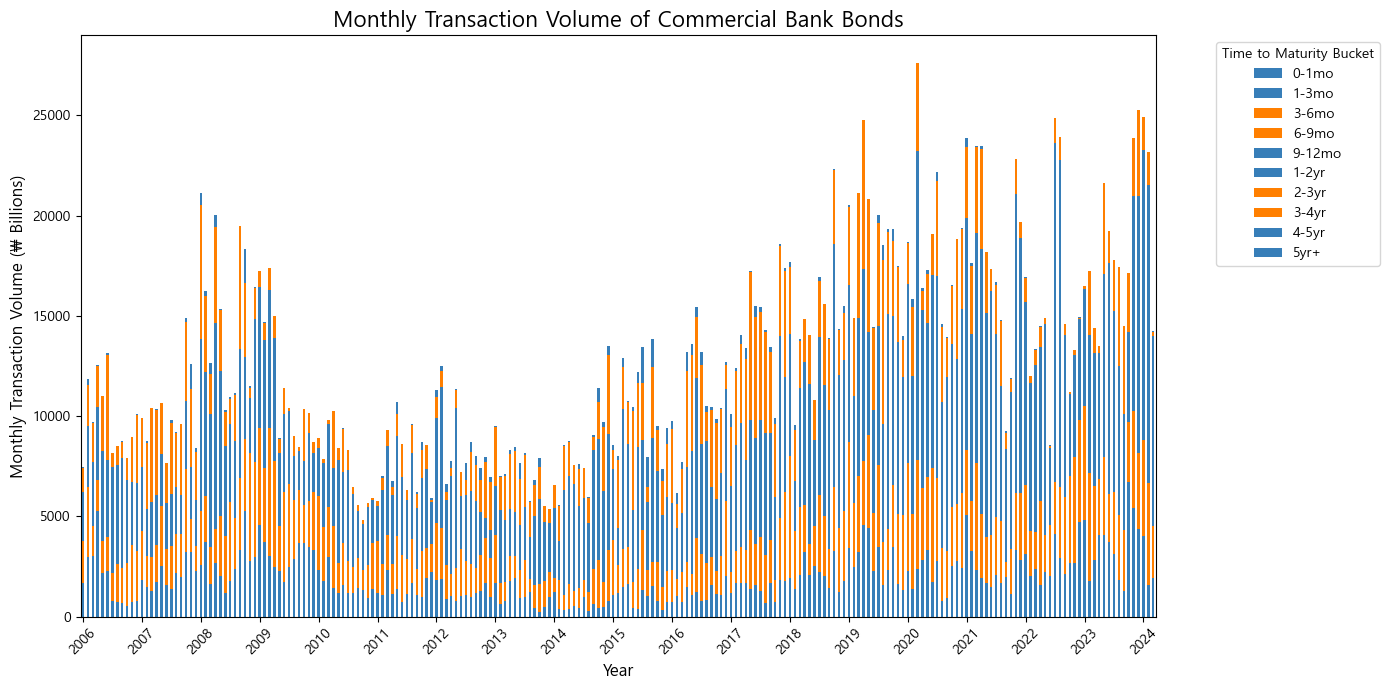

In [15]:
import matplotlib.pyplot as plt

bank['거래월'] = bank['거래일'].dt.to_period('M')

bank_filtered = bank.copy()
bank_filtered['time_to_maturity_range'] = pd.cut(
    bank_filtered['time_to_maturity'], bins=bins, labels=labels, right=False)

# Step 6: Group by '거래월' and 'time_to_maturity_range' and calculate the sum of '거래대금'
grouped = bank_filtered.groupby(
    ['거래월', 'time_to_maturity_range']
)['거래대금'].sum().unstack(fill_value=0) / 100000

plt.figure(figsize=(14, 7))


grouped.plot(
    kind='bar', stacked=True, color=contrast_colors, figsize=(14, 7))
years = [str(period.year) for period in grouped.index]
plt.xticks(ticks=range(0, len(grouped.index), 12), labels=years[::12], rotation=45)
plt.title('Monthly Transaction Volume of Commercial Bank Bonds', fontsize=16)
plt.ylabel('Monthly Transaction Volume (₩ Billions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Time to Maturity Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Step 4: Function to calculate the weighted median
def weighted_median(values, weights):
    # Sort values and weights by values (평균 수익률 기준 정렬)
    sorted_values, sorted_weights = zip(*sorted(zip(values, weights)))
    sorted_weights = np.cumsum(sorted_weights)  # Cumulative sum of weights
    total_weight = sorted_weights[-1]  # Total weight
    median_weight = total_weight / 2.0

    for i, weight in enumerate(sorted_weights):
        if weight >= median_weight:
            return sorted_values[i]*100

    return None

grouped = bank_filtered.groupby(['거래월', 'time_to_maturity_range']).apply(
    lambda group: weighted_median(group['평균수익률'], group['거래대금'])
).reset_index(name='credit_spread')

# Step 6: Pivot the data for plotting (separating by time_to_maturity_range)
pivoted = grouped.pivot(index='거래월', columns='time_to_maturity_range', values='credit_spread')
pivoted.shape

C:\Users\32mou\AppData\Local\Temp\ipykernel_4040\1091077937.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bank_filtered.groupby(['거래월', 'time_to_maturity_range']).apply(
C:\Users\32mou\AppData\Local\Temp\ipykernel_4040\1091077937.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = bank_filtered.groupby(['거래월', 'time_to_maturity_range']).apply(


(219, 10)

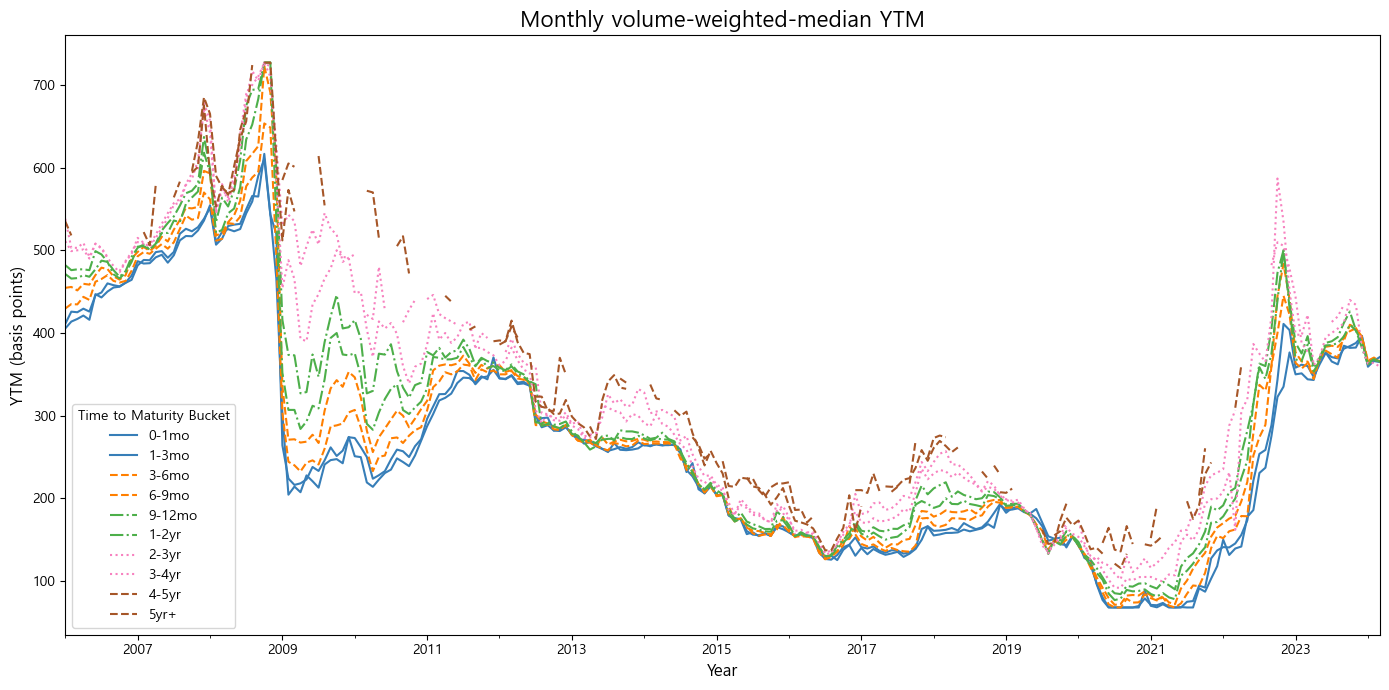

In [ ]:
plt.figure(figsize=(14, 7))
linestyle = ['-', '--', '-.', ':', '--'] 


for i, col in enumerate((pivoted.columns)):
    pivoted[col].plot(kind='line', label=col, 
        linestyle=linestyle[i//2],
    color=colors[i//2])

plt.title('Monthly volume-weighted-median YTM', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YTM (basis points)', fontsize=12)
years = [
    str(period.year) for period in pivoted.index]

plt.legend(title='Time to Maturity Bucket')
plt.tight_layout()
plt.show()


# CD

In [14]:
import pandas as pd
import numpy as np

cd = pd.read_csv("data/trans_detail_CD.csv").rename(
    columns={"거래일자": "거래일", "수익률(%)": "수익률"}
).rename(
    columns={"수익률": "평균수익률", "거래대금(억원)": "거래대금", "거래량(억원)": "거래량",}
)



cd.loc[cd["발행일"]==2180111, "발행일"] = 20180111


for c in ["거래일", "만기일"]:
    cd[c] = pd.to_datetime(cd[c], format='%Y%m%d').dt.strftime('%Y-%m-%d')

cd["발행일"] = cd["발행일"].astype(str).apply(lambda x: x[:4] + "-" + x[4:6] + "-" + x[6:])


cd["종류"] = "CD"
cd["거래대금"] = cd["거래대금"] / 10000
cd["거래량"] = cd["거래량"] / 10000

cd.head()

,거래일,시간,발행기관,발행일,만기일,잔존기간,평균수익률,거래량,거래대금,통화구분,거래구분,정정여부,종류
0,2010-01-04,31129,NH농협은행,2009-11-17,2010-05-17,133,3.17,0.01,0.0099,원화,매도,NaN,CD
1,2010-01-04,31129,하나 은행,2009-12-01,2010-06-01,148,3.49,0.01,0.0098,원화,매수,NaN,CD
2,2010-01-04,31129,하나 은행,2009-12-01,2010-06-01,148,3.49,0.01,0.0098,원화,매도,NaN,CD
3,2010-01-04,31129,하나 은행,2009-12-01,2010-06-01,148,3.49,0.01,0.0098,원화,매도,NaN,CD
4,2010-01-04,31129,씨티은행,2010-01-04,2010-03-05,60,2.81,0.01,0.0099,원화,매수,NaN,CD


In [15]:
kofia.columns.sort_values(), cd.columns.sort_values()

(Index(['FRN 가산금리(%)', 'FRN 금리(%)', 'flag', 'time_to_maturity', '거래건수', '거래대금',
        '거래량', '거래일', '기간', '등록기관', '만기상환율(%)', '만기일', '발행금액', '발행금액_flag',
        '발행금액_단위', '발행옵션', '발행일', '발행잔액', '발행잔액_단위', '보증기관', '보증형태',
        '분할상환회수(회)', '상장구분', '상장일', '선매출유형', '선매출일', '시장구분', '신용등급', '신용등급',
        '원금거치기간', '원리금지급기관', '이자계산주기(월)', '이자지급 선/후급', '이자지급유형', '잔존기간', '종류',
        '종목명', '주관회사', '채권종류', '최고수익률', '최저수익률', '평균단가(원)', '평균수익률', '표면금리(%)',
        '표준코드', '할인율(%)'],
       dtype='object'),
 Index(['거래구분', '거래대금', '거래량', '거래일', '만기일', '발행기관', '발행일', '시간', '잔존기간',
        '정정여부', '종류', '통화구분', '평균수익률'],
       dtype='object'))

In [16]:
# kofia["정정여부_CD"] = None
# kofia["거래구분_CD"] = None
# kofia["시간_CD"] = None
# kofia["발행기관_CD"] = None

# kofia = kofia.reset_index(drop=True)
# cd = cd.reset_index(drop=True)

# kofia_cd = pd.concat([
#     kofia, cd.rename(columns={
#                 "통화구분": "발행금액_단위", "정정여부": "정정여부_CD", "거래구분": "거래구분_CD",
#         "시간": "시간_CD", "발행기관": "발행기관_CD"})
# ], axis=0)
# kofia_cd.to_csv("kofia_cd_merged.csv", index=False)

# print(kofia.shape, cd.shape, kofia_cd.shape)

In [17]:
cd['거래일'] = pd.to_datetime(cd['거래일'], format='%Y-%m-%d')
cd['만기일'] = pd.to_datetime(cd['만기일'], format='%Y-%m-%d')
cd['time_to_maturity'] = (cd['만기일'] - cd['거래일']).dt.days
cd = cd.sort_values(by=["거래일", "time_to_maturity"])


In [20]:
cd = cd[(cd["거래대금"] != 0) & (cd["통화구분"] == "원화") \
    & (cd["time_to_maturity"] >= 0)]


lower_limit = cd["평균수익률"].quantile(0.01)  # 하위 1%
upper_limit = cd["평균수익률"].quantile(0.99)  # 상위 99%
cd["평균수익률"]= cd["평균수익률"].clip(lower=lower_limit, upper=upper_limit)

print(cd.shape, cd["거래일"].value_counts().shape)
cd["발행기관"].value_counts().sort_index()

(70885, 14) (3041,)


발행기관
HSBC은행           208
NH농협은행          4371
OCBC은행 서울지점        6
경남은행            3093
광주은행             972
국민은행           15078
기업은행             717
대화은행              11
부산은행            3308
수협은행            5139
스탠다드차타드은행       5028
신한은행            6450
씨티은행            1186
아이엠뱅크           2198
우리은행            7562
전북은행             432
제주은행             322
중국건설은행           203
중국공상은행           200
중국광대은행            13
중국농업은행           484
중국은행             151
하나 은행           8655
하나은행            1183
한국산업은행          3216
Name: count, dtype: int64

In [21]:
cd = cd[~cd["발행기관"].str.contains(r"대화|HSBC|중국|OCBC|수협|농협|한국산업|씨티|기업|스탠다드차타드", na=False, regex=True)]

print(cd["발행기관"].unique())

['하나 은행' '국민은행' '신한은행' '우리은행' '아이엠뱅크' '부산은행' '하나은행' nan '제주은행' '광주은행'
 '경남은행' '전북은행']


In [37]:
cd["통화구분"].value_counts(dropna=False)

통화구분
원화    49952
Name: count, dtype: int64

In [47]:
df = cd.groupby(['거래일', 'time_to_maturity']).agg({
    '평균수익률': lambda x: np.average(
        x, weights=cd.loc[x.index, '거래대금']),
    '거래대금': 'sum'  # Sum of 거래금액 for future reference or use
}).reset_index()

presence_matrix = df.pivot(
    index='거래일', columns='time_to_maturity', values='평균수익률'
)

presence_matrix = presence_matrix.notna().astype(int)

print(presence_matrix.shape)

(2452, 386)


<Axes: xlabel='time_to_maturity'>

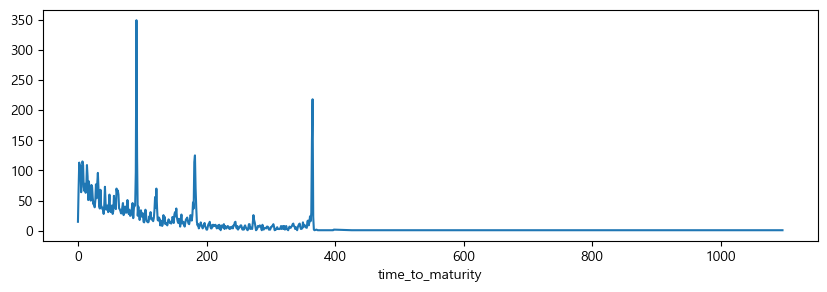

In [32]:
plt.figure(figsize=(10, 3))
presence_matrix.sum(axis=0).plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

maturity_ticks = bins.copy()

def plot_heatmap(presence_matrix, freq="D", maxdays=365):
    scale = "Daily" if freq == "D" else "Monthly"

    if not isinstance(presence_matrix.index, pd.DatetimeIndex):
        presence_matrix.index = pd.to_datetime(presence_matrix.index).strftime("%Y-%m-%d")

    presence_matrix.columns = presence_matrix.columns.astype(int)

    if freq == "M":
        presence_matrix = presence_matrix.resample('M').max()

    cmap = ListedColormap(['white', 'blue'])
    plt.figure(figsize=(25, 10))
    temp_maturity_ticks = [tick for tick in maturity_ticks if tick <= maxdays]
    presence_matrix = presence_matrix[[c for c in presence_matrix.columns if c <= maxdays]].copy()
    for c in (c for c in temp_maturity_ticks if c not in presence_matrix.columns):
        if c <= maxdays:
            presence_matrix[c] = 0

    ax = sns.heatmap(
        presence_matrix,
        cmap=cmap,
        cbar_kws={'label': 'Data Point Presence (1=Present, 0=Missing)'},
        linewidths=0  
    )

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    if freq == "M":
        ax.set_yticklabels([label.get_text()[:7] for label in ax.get_yticklabels()], rotation=0, fontsize=8)  # Show YYYY-MM
        ylabel = 'Transaction Date (Year-Month)'
    else:
        ax.set_yticklabels([label.get_text()[:10] for label in ax.get_yticklabels()], rotation=0, fontsize=8)  # Show YYYY
        ylabel = f'Transaction Date ({scale})'
  
    
    ax.set_xticks(
        [presence_matrix.columns.get_loc(tick) 
        for tick in temp_maturity_ticks ])
    ax.set_xticklabels([f"{tick}D" for tick in temp_maturity_ticks], rotation=45, ha='right')

    plt.xlabel(f'Time to Maturity ({scale})')
    plt.ylabel(ylabel)
    plt.title(f'CD Bond TX Data Point Presence ({scale}-scale)')
    plt.show()


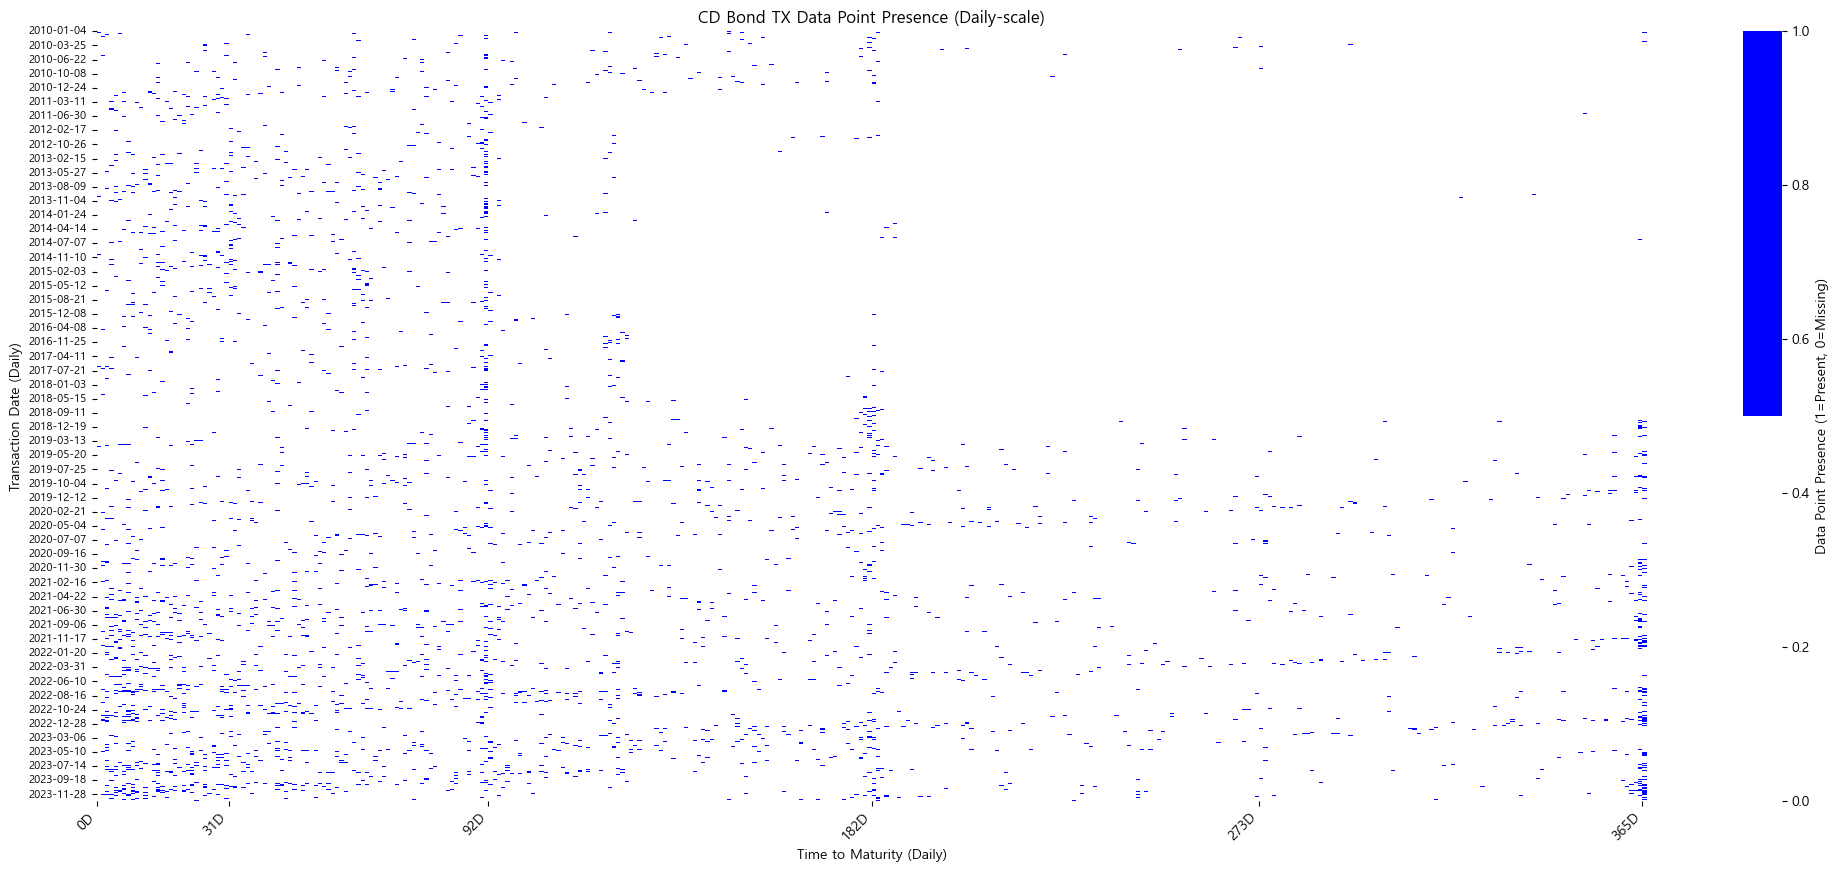

In [40]:
plot_heatmap(presence_matrix, freq='D')

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def plot_3d_surface_upto_year(pivot_table, data='수익률'):

    X = pivot_table['time_to_maturity']
    Y = pivot_table['거래일_num']
    Z = pivot_table[data]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')

    cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Average Yield (%)')

    # Set labels and title
    ax.set_xlabel('Time to Maturity (years)')
    ax.set_ylabel('Date (Year)')
    ax.set_zlabel('Average Yield (%)')
    ax.set_title(f'3D Surface Plot of Yield Curves Over Time')

    maturity_ticks = bins.copy()
    ax.set_xticks(maturity_ticks)
    ax.set_xticklabels([f"{tick}D" for tick in maturity_ticks], rotation=45, ha='right')

    unique_years = pivot_table['거래일_year'].unique()
    ax.set_yticks([pd.Timestamp(str(year)).timestamp() for year in unique_years])
    ax.set_yticklabels(unique_years)
    plt.show()

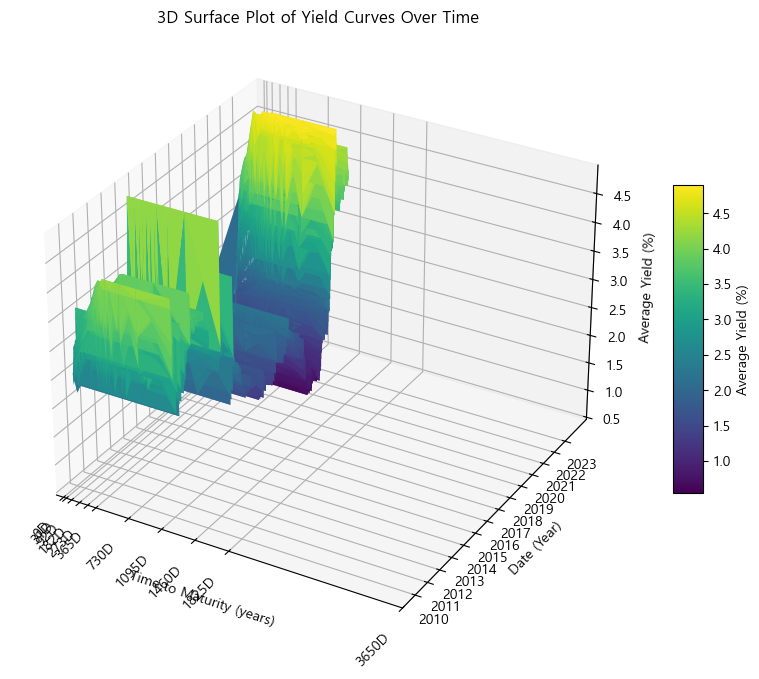

In [52]:
presence_matrix = df.pivot(
    index='거래일', columns='time_to_maturity', values='평균수익률')
pivot_table = presence_matrix.interpolate(method='linear', axis=1)

pivot_table = pivot_table.stack().reset_index()
pivot_table.columns = ['거래일', 'time_to_maturity', '평균수익률']

pivot_table['거래일_year'] = pd.to_datetime(pivot_table['거래일']).dt.year
pivot_table['거래일_num'] = pd.to_datetime(pivot_table['거래일']).astype("int64") / 10**9

plot_3d_surface_upto_year(pivot_table, data='평균수익률')
# start from 2010

# Risk free Curve = CD & 국고채

In [118]:
rf = pd.concat([
    gov[["거래일", "time_to_maturity", "종목명", "평균수익률", "거래대금", '거래량',  '거래건수', '종류', '발행일', '만기일', '기간', 'flag', 
        '표면금리(%)', '이자지급유형', '이자지급 선/후급', '이자계산주기(월)', '분할상환회수(회)', '발행옵션', ]], 
    cd[['거래일', 'time_to_maturity', '평균수익률', '거래대금', '거래량', '종류', '발행일', '만기일']]
]).reset_index(drop=True).sort_values(by=["거래일", "time_to_maturity"])


rf.shape, rf["평균수익률"].describe()

((351579, 18),
 count    351579.000000
 mean          2.856151
 std           1.343744
 min           0.550000
 25%           1.740000
 50%           2.674000
 75%           3.760000
 max           6.133000
 Name: 평균수익률, dtype: float64)

In [119]:
rf[rf["종목명"].str.contains("물가연동", na=False)]

,거래일,time_to_maturity,종목명,평균수익률,거래대금,거래량,거래건수,종류,발행일,만기일,기간,flag,표면금리(%),이자지급유형,이자지급 선/후급,이자계산주기(월),분할상환회수(회),발행옵션
15267,2007-03-21,3642,물가연동국고채권02750-1703,2.820,2984700.0,3000000.0,1.0,국채,2007-03-10,2017-03-10,3653.0,NaN,2.750,이표채,후급,6.0,-,비옵션부
15316,2007-03-22,3641,물가연동국고채권02750-1703,2.820,4974500.0,5000000.0,4.0,국채,2007-03-10,2017-03-10,3653.0,NaN,2.750,이표채,후급,6.0,-,비옵션부
15361,2007-03-23,3640,물가연동국고채권02750-1703,2.820,12933700.0,13000000.0,11.0,국채,2007-03-10,2017-03-10,3653.0,NaN,2.750,이표채,후급,6.0,-,비옵션부
15598,2007-03-29,3634,물가연동국고채권02750-1703,2.740,491078.0,490000.0,1.0,국채,2007-03-10,2017-03-10,3653.0,NaN,2.750,이표채,후급,6.0,-,비옵션부
15642,2007-03-30,3633,물가연동국고채권02750-1703,2.720,517710.0,516430.0,4.0,국채,2007-03-10,2017-03-10,3653.0,NaN,2.750,이표채,후급,6.0,-,비옵션부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300958,2024-03-14,3010,물가연동국고채권 01625-3206(22-6),0.718,6459600.0,6000000.0,3.0,국채,2022-06-10,2032-06-10,3653.0,NaN,1.625,이표채,후급,6.0,-,비옵션부
301049,2024-03-15,3009,물가연동국고채권 01625-3206(22-6),0.621,47732.0,44000.0,1.0,국채,2022-06-10,2032-06-10,3653.0,NaN,1.625,이표채,후급,6.0,-,비옵션부
301264,2024-03-20,812,물가연동국고채권 01000-2606(16-5),0.552,223520.0,220000.0,1.0,국채,2016-06-10,2026-06-10,3652.0,NaN,1.000,이표채,후급,6.0,-,비옵션부
301317,2024-03-20,3004,물가연동국고채권 01625-3206(22-6),0.768,6435300.0,6000000.0,3.0,국채,2022-06-10,2032-06-10,3653.0,NaN,1.625,이표채,후급,6.0,-,비옵션부


In [55]:
temp =  rf[(rf["거래일"]<"2011-01-01") \
        & (rf["time_to_maturity"]>1825) &(rf["time_to_maturity"]<3650)]

temp[temp["평균수익률"]< 3]["이자지급유형"].value_counts(dropna=False), temp[temp["평균수익률"]< 3]["종목명"].value_counts(dropna=False)

(이자지급유형
 이표채    663
 복리채     25
 Name: count, dtype: int64,
 종목명
 물가연동국고채권02750-1703           526
 물가연동국고채권 02750-2006(10-4)    137
 국민주택2종2006-11                  6
 국민주택3종2005-12                  4
 국민주택2종2009-06                  3
 국민주택2종2009-10                  3
 국민주택2종2009-11                  2
 국민주택3종2005-09                  2
 국민주택2종2006-12                  1
 국민주택3종2005-11                  1
 국민주택2종2009-08                  1
 국민주택2종2009-03                  1
 국민주택2종2009-05                  1
 Name: count, dtype: int64)

In [22]:
df = rf.groupby(['거래일', 'time_to_maturity']).agg({
    '평균수익률': lambda x: np.average(
        x, weights=rf.loc[x.index, '거래대금']),
    '거래대금': 'sum'
}).reset_index()

presence_matrix = df.pivot(
    index='거래일', columns='time_to_maturity', values='평균수익률'
)

presence_matrix = presence_matrix.notna().astype(int)
print(presence_matrix.shape)

(4522, 14230)


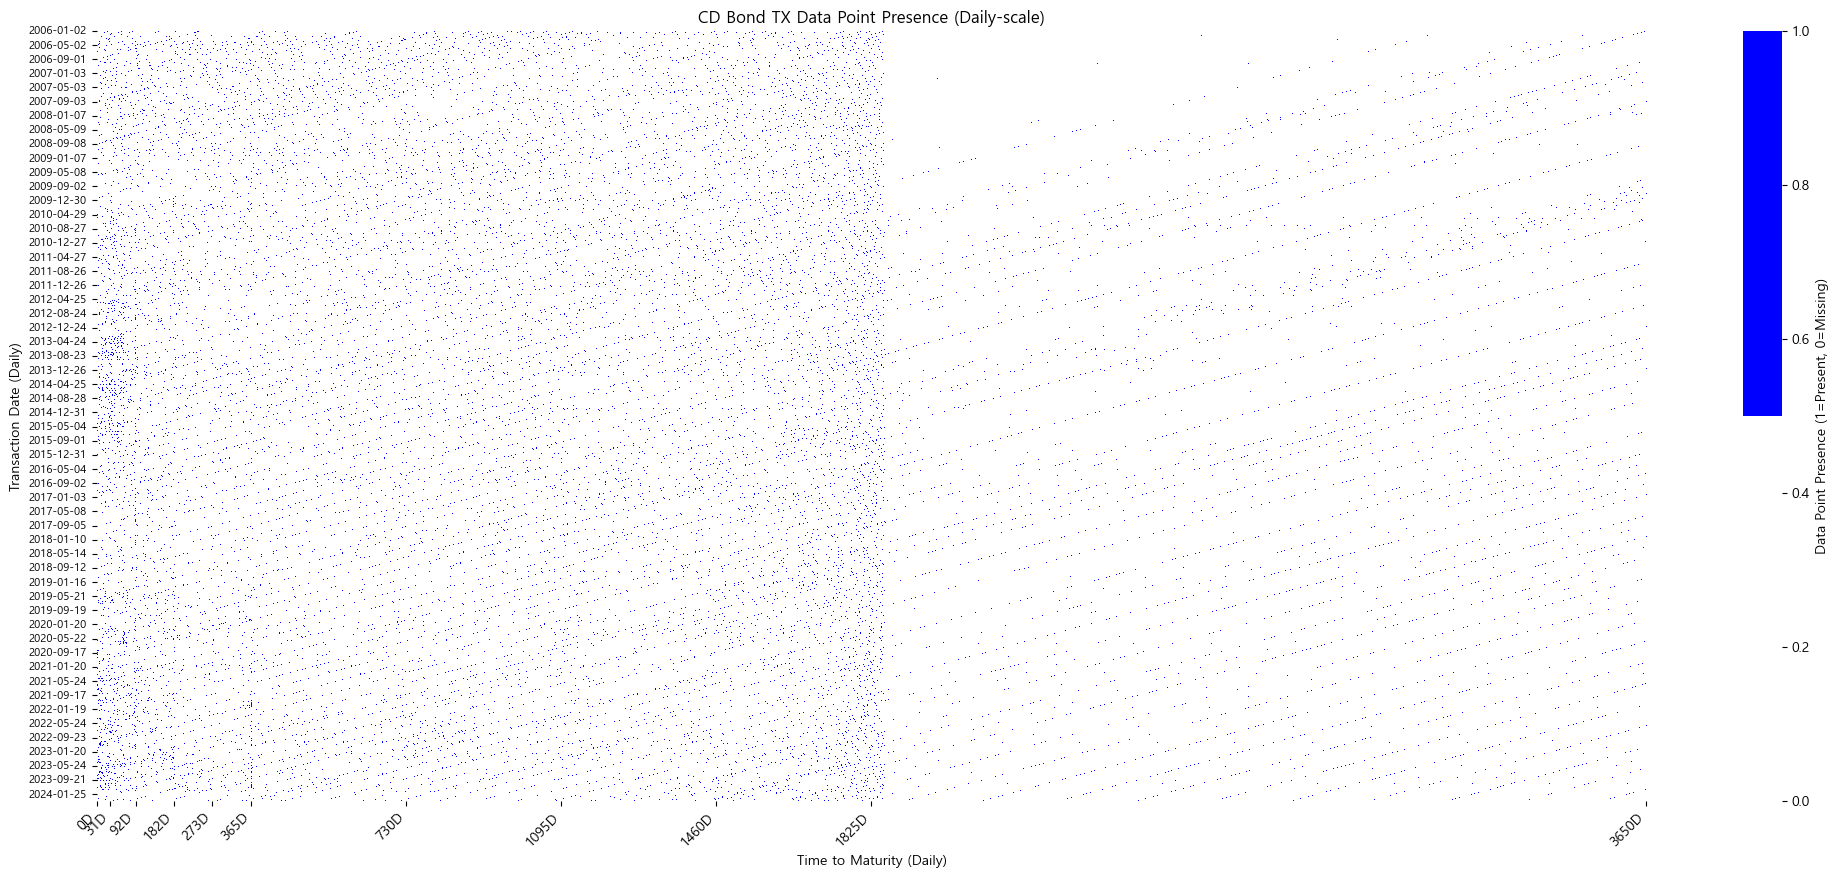

In [57]:
plot_heatmap(presence_matrix, freq='D', maxdays=bins[-1])

In [58]:
presence_matrix = df.pivot(
    index='거래일', columns='time_to_maturity', values='평균수익률')
presence_matrix.shape

(4522, 14230)

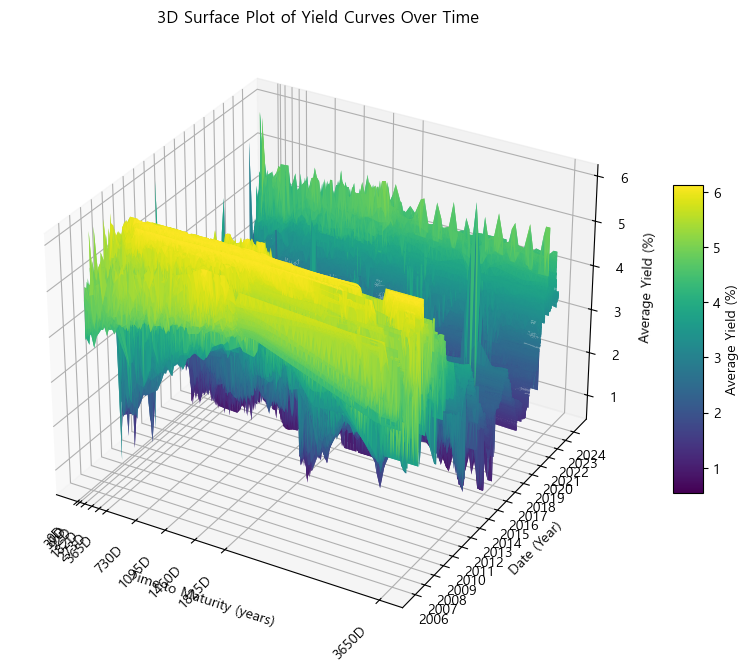

In [59]:
year=10
maxdays = 365*year+1

presence_matrix = presence_matrix[
    [c for c in presence_matrix.columns if c <= maxdays]]

pivot_table = presence_matrix.interpolate(method='linear', axis=1)

pivot_table = pivot_table.stack().reset_index()
pivot_table.columns = ['거래일', 'time_to_maturity', '평균수익률']

pivot_table['거래일_year'] = pd.to_datetime(pivot_table['거래일']).dt.year
pivot_table['거래일_num'] = pd.to_datetime(pivot_table['거래일']).astype("int64") / 10**9

plot_3d_surface_upto_year(pivot_table, data='평균수익률')
# start from 2006

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

colormap = cm.Reds

def filter_data(date, pivot_table, ecos=pd.DataFrame(), date_dt = None):
    if not date_dt:
        date_dt = pd.date_dt = pd.to_datetime(date, errors='raise')
    # Determine the level of granularity based on the input date
    if len(date) == 4:  # Year only, e.g., "2023"
        date_filtered = pivot_table[pivot_table['거래일'].dt.year == int(date)]
        if not ecos.empty: 
            ecos_filtered = ecos[ecos.index.year == int(date_dt.year)]
        plot_type = "scatter"
    elif len(date) == 7:  # Year and month, e.g., "2023-01"
        date_filtered = pivot_table[(pivot_table['거래일'].dt.year == int(date[:4])) &
                                    (pivot_table['거래일'].dt.month == int(date[5:7]))]
        if not ecos.empty: 
            ecos_filtered = ecos[(ecos.index.year == int(date[:4])) & (ecos.index.month == int(date[5:7]))]
        plot_type = "scatter"
    elif len(date) == 10:  # Full date, e.g., "2023-01-01"
        date_filtered = pivot_table[pivot_table['거래일'] == pd.to_datetime(date)]
        if not ecos.empty: 
            ecos_filtered = ecos[ecos.index == date_dt]
        plot_type = "line"
    else:
        print(f"Invalid date format: {date}")
        return pd.DataFrame(), pd.DataFrame(), ""
    if not ecos.empty: 
        return date_filtered, ecos_filtered, plot_type
    return date_filtered, None, None

def poly_fit(X, Y, deg=3):
    return np.poly1d(np.polyfit(X, Y, deg))

def poly_fit_yield(X, Y, deg=3):
    poly_fit_func = poly_fit(X, Y, deg)
    x_smooth = np.linspace(X.min(), X.max(), 200)
    y_smooth = poly_fit_func(x_smooth)
    return (x_smooth, y_smooth)


In [24]:
convert_day = {
    "일": 1,
    "년": 365
}


def plot_yield_curve_for_date(
    pivot_table, ecos, date, data='평균수익률', deg=None, show=True, tag=""):

    if not pd.api.types.is_datetime64_any_dtype(pivot_table['거래일']):
        pivot_table['거래일'] = pd.to_datetime(pivot_table['거래일'])

    try:
        date_dt = pd.to_datetime(date, errors='raise')
    except ValueError:
        print(f"Invalid date format: {date}")
        return

    
    date_filtered, ecos_filtered, plot_type = filter_data(
        date, pivot_table, ecos, date_dt)

    if date_filtered.empty:
        print(f"No data available for the specified date [{tag}]: {date}")
        return (None, None)

    X = date_filtered['time_to_maturity'] #/ 365  # Convert days to years for the x-axis
    Y = date_filtered[data]

    if not show:
        return  poly_fit_yield(X, Y, deg)

    if ecos_filtered.empty:
        print(f"No data available for the specified date [ECOS]: {date}")
        return (None, None)

    ecos_filtered = ecos_filtered.dropna(axis=1, how='all')

    plt.figure(figsize=(10, 6))
    if plot_type == "line":
        plt.plot(X, Y, color=colors[-3], linewidth=2, label=f'Kofia TX') 
    else:
        plt.scatter(X, Y, color=colors[-3], label=f'Kofia TX', s=2) 


    
    ecos_maturities =ecos_filtered.columns.str.extract(r'(\d+)').astype(int).squeeze()
    for i in range(ecos_maturities.shape[0]):
        ecos_maturities[i] *= convert_day[ecos_filtered.columns[i][-2]]
    if isinstance(ecos_maturities, np.int32):
        ecos_maturities = [ecos_maturities]

        
    for idx, (maturity, col_name) in enumerate(zip(ecos_maturities, ecos_filtered.columns)):
        ecos_yields = ecos_filtered[col_name]
        plt.scatter(
            [maturity] * len(ecos_yields), ecos_yields, color=colors[idx],
            s=50, marker='x', label=f'Ecos Data {maturity}Y')

    if deg is not None and not date_filtered.empty:
        x_smooth, y_smooth = poly_fit_yield(X, Y, deg)
        plt.plot(x_smooth, y_smooth, color=colors[-1], linestyle='--', linewidth=3.0, label=f'Poly Fit (deg={deg})')

    plt.xlabel('Time to Maturity (days)')
    plt.ylabel('Average Yield (%)')
    plt.title(f'Yield Curve for {date}')
    plt.legend()
    plt.grid(True)

    plt.show()

    return (None, None)

    # Example usage:
    # Assuming pivot_table and ecos are loaded with necessary columns
    # plot_yield_curve_for_date(df, ecos.iloc[:,:], date='2010', data='수익률', deg=3)
# plot_yield_curve_for_date(df, pd.DataFrame(ecos.iloc[:,:]), 
#     date='2010', data='평균수익률', deg=3)

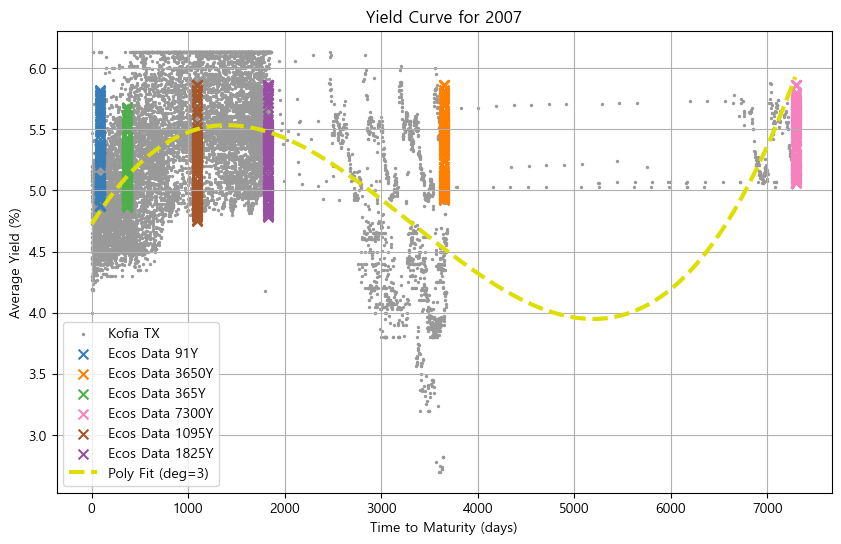

(None, None)

In [25]:
plot_yield_curve_for_date(rf, ecos, date='2007', data='평균수익률', deg=3)

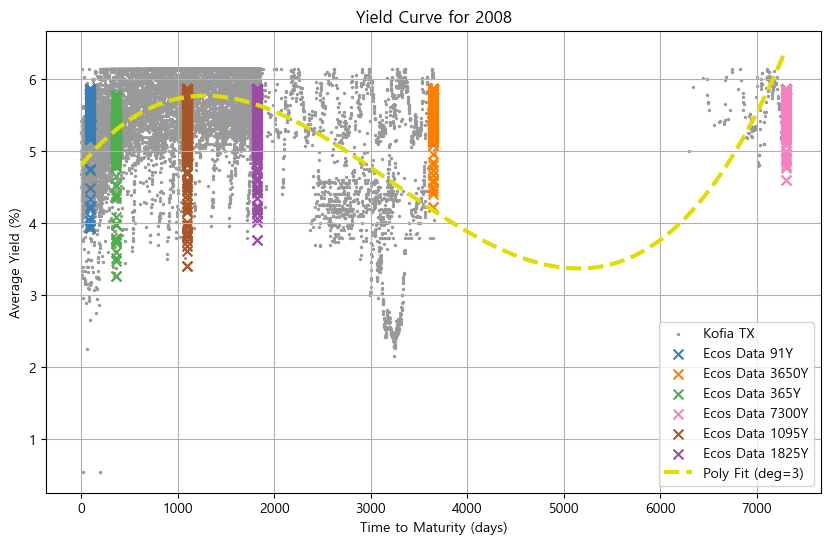

(None, None)

In [26]:
plot_yield_curve_for_date(rf, ecos, date='2008', data='평균수익률', deg=3)

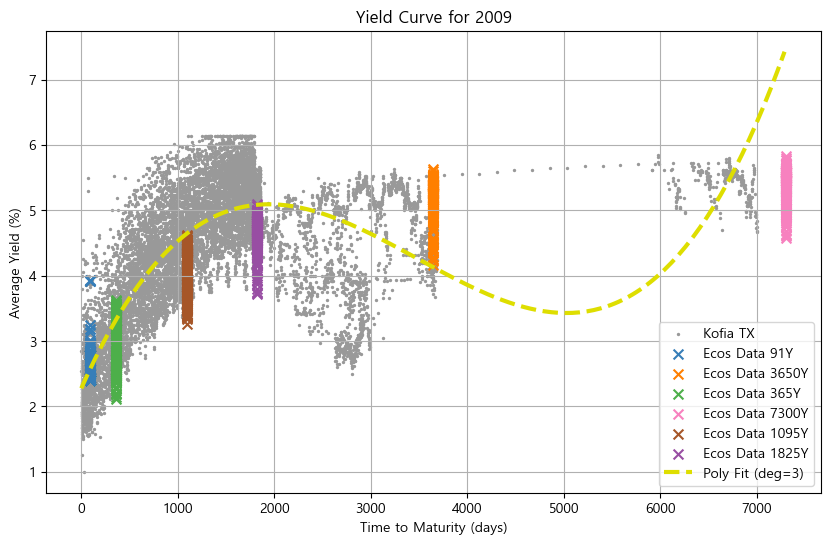

(None, None)

In [27]:
plot_yield_curve_for_date(rf, ecos, date='2009', data='평균수익률', deg=3)

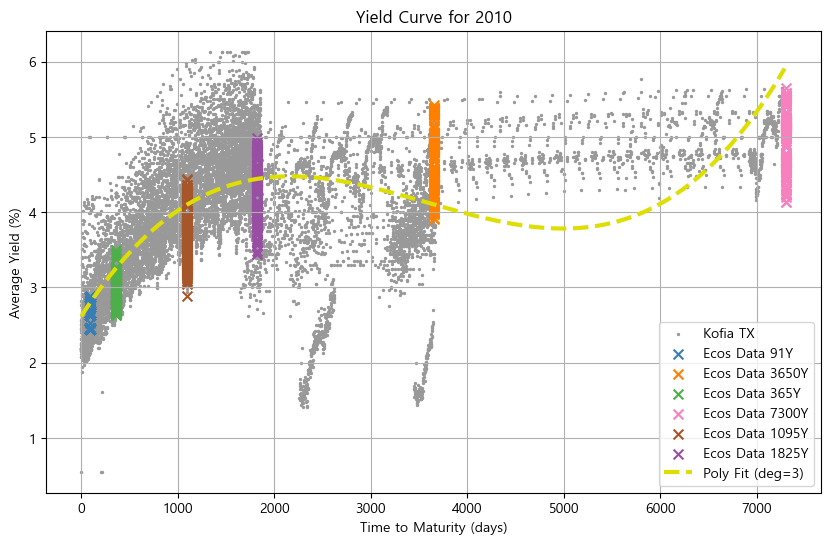

(None, None)

In [28]:
plot_yield_curve_for_date(rf, ecos, date='2010', data='평균수익률', deg=3)

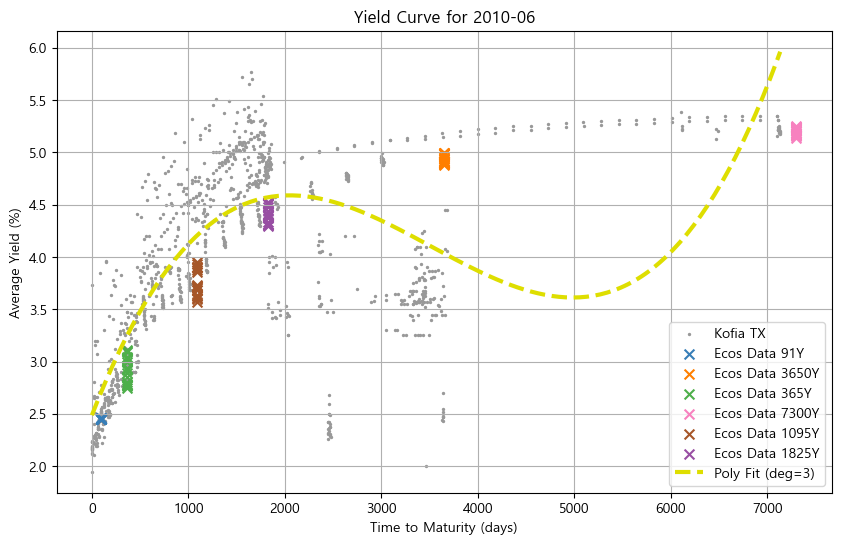

(None, None)

In [29]:
plot_yield_curve_for_date(rf, ecos, date='2010-06', data='평균수익률', deg=3)

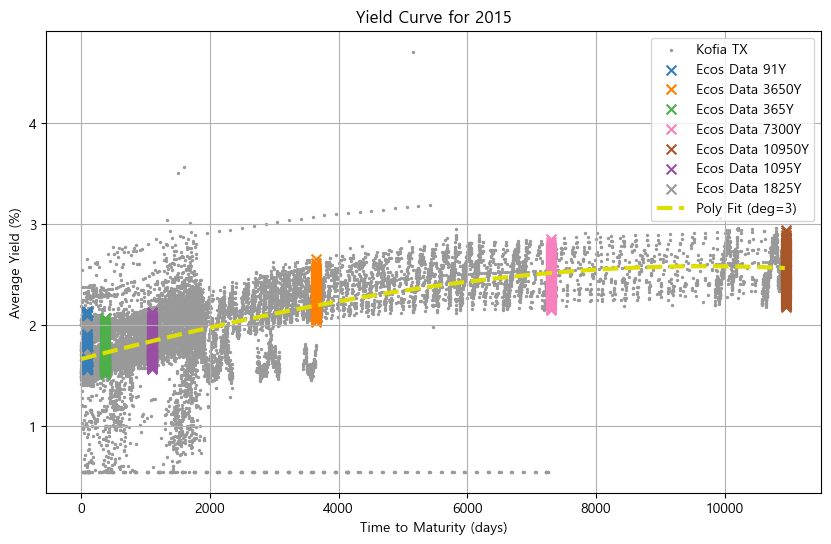

(None, None)

In [30]:
plot_yield_curve_for_date(rf, ecos, date='2015', data='평균수익률', deg=3)

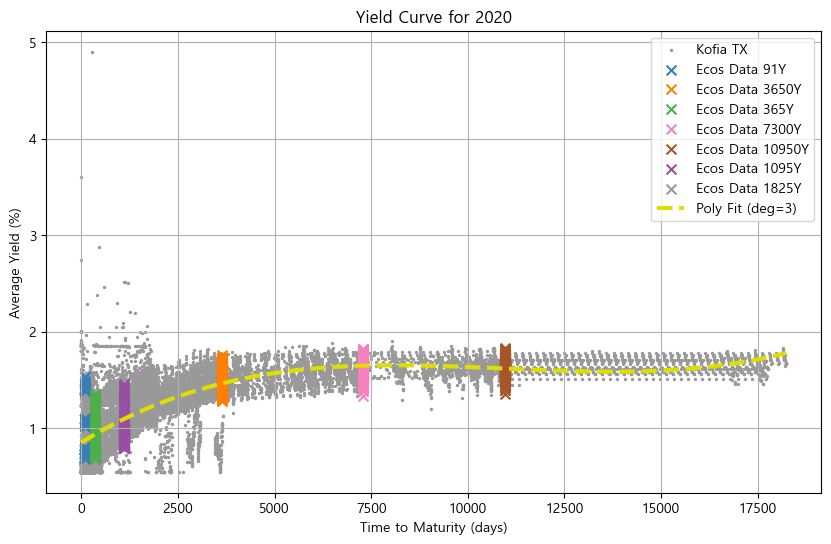

(None, None)

In [31]:
plot_yield_curve_for_date(rf, ecos, date='2020', data='평균수익률', deg=3)

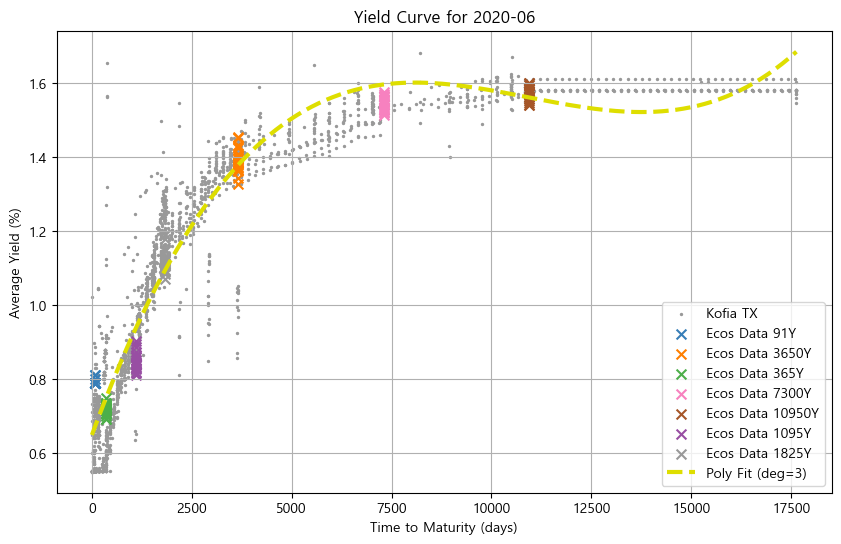

(None, None)

In [32]:
plot_yield_curve_for_date(rf, ecos, date='2020-06', data='평균수익률', deg=3)

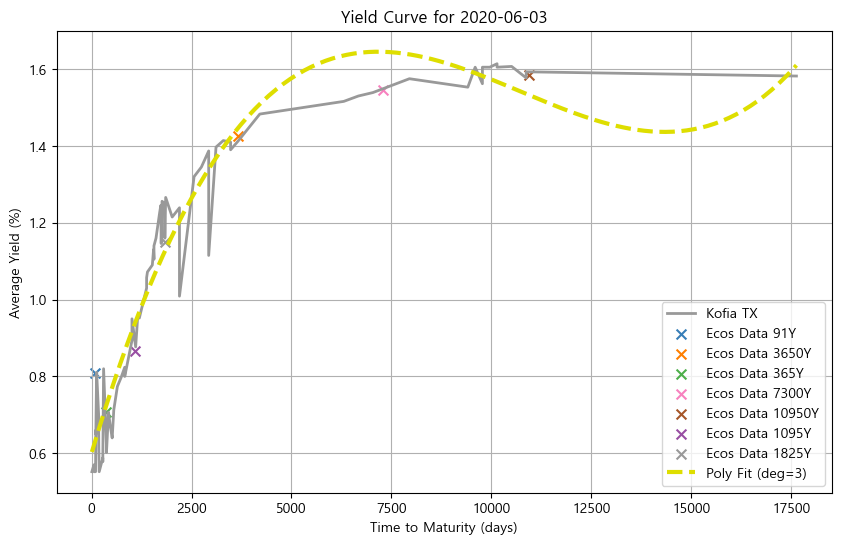

(None, None)

In [33]:
plot_yield_curve_for_date(rf, ecos, date='2020-06-03', data='평균수익률', deg=3)

# Daily RF Curve

In [120]:
date_range = pd.bdate_range('20060102', '20240325', freq='B')
print(date_range[0].strftime("%Y-%m-%d"), date_range[-1].strftime("%Y-%m-%d"))
date_range.shape

2006-01-02 2024-03-25


(4756,)

In [121]:
date_range = pd.concat([bank["거래일"], rf["거래일"]]).sort_values().unique().strftime("%Y-%m-%d")
print(date_range.shape)

rf_yield_curve = [[None, None] for _ in range(date_range.shape[0])]
bank_yield_curve = [[None, None] for _ in range(date_range.shape[0])]


def simple_poly_fit(date, table, data="평균수익률", tag=""):
    return poly_fit(
        table['time_to_maturity'],
        table[data],
        deg=3,
    )

for i in range(0, date_range.shape[0], 1):
    date_filtered, _, _ = filter_data(date_range[i], rf)
    if date_filtered.empty: continue;
    rf_yield_curve[i][0] = date_filtered.shape[0]
    rf_yield_curve[i][1] = simple_poly_fit(date_range[i], date_filtered, tag="rf") 

    date_filtered, _, _ = filter_data(date_range[i], bank)
    if date_filtered.empty: continue;
    bank_yield_curve[i][0] = date_filtered.shape[0]
    bank_yield_curve[i][1] = simple_poly_fit(date_range[i], date_filtered, tag="bank")
    

(4522,)


C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:35: RankWarning: Polyfit may be poorly conditioned
  return np.poly1d(np.polyfit(X, Y, deg))
C:\Users\32mou\AppData\Local\Temp\ipykernel_17832\526073300.py:3

In [122]:
import pickle


with open("rf_curve.pkl","wb") as f:
    pickle.dump(rf_yield_curve, f)


with open("bank_curve.pkl","wb") as f:
    pickle.dump(bank_yield_curve, f)

In [123]:
def sparce_points(data, threshold=25):
    print(f"Data points with less than {threshold} data points:")
    for i in range(len(data)):
        if data[i][0] and data[i][0] <= threshold: 
            print(f"[{i}] = Date: {date_range[i]}, {data[i][0]} points")

sparce_points(rf_yield_curve)
print()
sparce_points(bank_yield_curve)

Data points with less than 25 data points:
[713] = Date: 2008-11-18, 22 points
[769] = Date: 2009-02-10, 25 points
[872] = Date: 2009-07-07, 23 points
[892] = Date: 2009-08-04, 23 points
[961] = Date: 2009-11-10, 25 points
[2490] = Date: 2015-12-31, 20 points
[2737] = Date: 2016-12-30, 16 points
[3473] = Date: 2019-12-31, 7 points
[3489] = Date: 2020-01-23, 6 points
[3971] = Date: 2021-12-31, 11 points
[4218] = Date: 2022-12-30, 24 points

Data points with less than 25 data points:
[0] = Date: 2006-01-02, 15 points
[1] = Date: 2006-01-03, 17 points
[2] = Date: 2006-01-04, 22 points
[3] = Date: 2006-01-05, 8 points
[4] = Date: 2006-01-06, 16 points
[5] = Date: 2006-01-09, 20 points
[6] = Date: 2006-01-10, 17 points
[7] = Date: 2006-01-11, 12 points
[8] = Date: 2006-01-12, 21 points
[9] = Date: 2006-01-13, 9 points
[10] = Date: 2006-01-16, 11 points
[11] = Date: 2006-01-17, 8 points
[12] = Date: 2006-01-18, 11 points
[13] = Date: 2006-01-19, 10 points
[14] = Date: 2006-01-20, 14 points
[

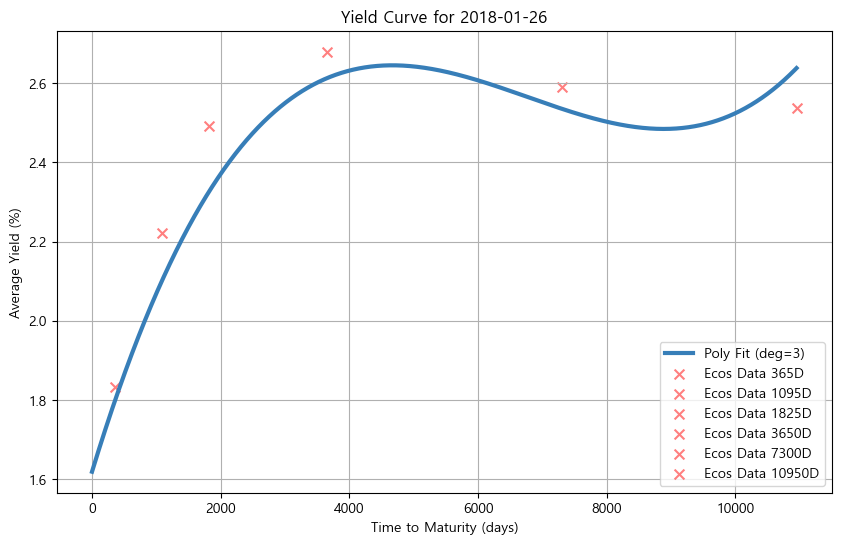

In [124]:
idx = 3000
year = 30
x_smooth = np.linspace(1, 365*year, 252*year)
y_smooth = rf_yield_curve[idx][1](x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color=colors[0], linestyle='-', 
    linewidth=3.0, label=f'Poly Fit (deg=3)')

date = date_range[idx]


convert_day = {
    "일": 1,
    "년": 365
}

ecos_cols = ecos.columns.str.extract(r'(\d+)').astype(int).squeeze()
for i in range(ecos_cols.shape[0]):
    ecos_cols[i] *= convert_day[ecos.columns[i][-2]]

for i, d in enumerate(ecos.loc[date]):
    if not d: continue;
    plt.scatter(ecos_cols[i], d,
        color='r', s=50, marker='x', 
        label=f'Ecos Data {ecos_cols[i]}D', 
        alpha=0.5)


plt.xlabel('Time to Maturity (days)')
plt.ylabel('Average Yield (%)')
plt.title(f'Yield Curve for {date}')
plt.legend()
plt.grid(True)
plt.show()

# Yield Gap - 1. ECOS 국고채

In [125]:
dataset_name = "ECOS"
ecos.iloc[:, 1:]

계정항목,국고채(3년),국고채(5년),국고채(10년),국고채(20년),국고채(30년)
2006-03-09,4.949362,5.162979,5.428723,5.617333,NaN
2006-03-10,4.88,5.04,5.31,5.59,NaN
2006-03-13,4.94,5.13,5.4,5.67,NaN
2006-03-14,4.91,5.11,5.38,5.66,NaN
2006-03-15,4.88,5.09,5.37,5.65,NaN
...,...,...,...,...,...
2024-08-28,2.919,2.977,3.054,3.059,2.969
2024-08-29,2.939,3.0,3.075,3.078,2.987
2024-08-30,2.953,3.01,3.088,3.084,2.978
2024-09-02,2.989,3.049,3.121,3.118,3.002


In [126]:
ecos = ecos[[ '국고채(1년)', '국고채(3년)',
       '국고채(5년)', '국고채(10년)','국고채(20년)', '국고채(30년)', ]]
print(ecos.columns)
ecos.iloc[9]

Index(['국고채(1년)', '국고채(3년)', '국고채(5년)', '국고채(10년)', '국고채(20년)', '국고채(30년)'], dtype='object', name='계정항목')


계정항목
국고채(1년)     4.56
국고채(3년)     4.92
국고채(5년)     5.15
국고채(10년)    5.47
국고채(20년)    5.73
국고채(30년)     NaN
Name: 2006-03-22 00:00:00, dtype: object

In [127]:
ecos_index = [365,  365*3, 365*5, 10*365, 20*365, 30*365,]

is_empty = False

yield_gap = [[None]*len(ecos_index) for _ in range(len(rf_yield_curve))]

for i in range(len(rf_yield_curve)):
    x = ecos_index
    y = ecos.loc[ecos.index==date_range[i]]
    if y.empty: 
        if not is_empty:
            print(f"{dataset_name} Empty ~ Date from {date_range[i]}")
            is_empty = True
        continue
    if is_empty:
        print(f"{dataset_name} Filled ~ Date from {date_range[i]}")
        print()
        is_empty = False

    y_smooth = rf_yield_curve[i][1](ecos_index)
    y = y.values[0]
    yield_gap[i] = y - y_smooth

yield_gap = pd.DataFrame(yield_gap, columns=ecos.columns)
yield_gap["Date"] = date_range
yield_gap = yield_gap.set_index("Date").dropna(axis=0, how='all')
yield_gap = yield_gap.abs().sort_index()

yield_gap

ECOS Empty ~ Date from 2006-01-02
ECOS Filled ~ Date from 2006-03-09



계정항목,국고채(1년),국고채(3년),국고채(5년),국고채(10년),국고채(20년),국고채(30년)
Date,,,,,,
2006-03-09,0.081185,0.279501,0.211853,0.672761,0.075804,NaN
2006-03-10,0.039585,0.288024,0.213456,0.198293,18.045319,NaN
2006-03-13,0.016579,0.383260,0.342772,0.948692,0.094691,NaN
2006-03-14,0.035863,0.333459,0.384198,0.944124,10.503595,NaN
2006-03-15,0.206415,0.316920,0.201233,0.644456,0.072031,NaN
...,...,...,...,...,...,...
2024-03-19,0.048657,0.089505,0.089473,0.033450,0.126289,0.120531
2024-03-20,0.044996,0.058112,0.056315,0.025426,0.017111,0.066431
2024-03-21,0.091157,0.131506,0.102996,0.033493,0.061932,0.145860


In [128]:
y, y_smooth

(array([3.328, 3.29, 3.331, 3.37, 3.361, 3.277], dtype=object),
 array([3.40737943, 3.43069216, 3.44377039, 3.43865991, 3.32283544,
        3.17683867]))

In [129]:
yield_gap[yield_gap.index<="2012-01-01"].describe()

계정항목,국고채(1년),국고채(3년),국고채(5년),국고채(10년),국고채(20년),국고채(30년)
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,0.0
mean,0.224210,0.411925,0.230568,0.960889,5.763167,NaN
std,0.185332,0.236271,0.183689,0.939556,15.076447,NaN
min,0.000191,0.001244,0.000036,0.001254,0.003012,NaN
25%,0.080075,0.255119,0.108189,0.619523,0.475090,NaN
50%,0.176420,0.353094,0.192942,0.959048,0.916570,NaN
75%,0.318169,0.509302,0.296724,1.248180,4.104471,NaN
max,1.045893,1.837131,1.381486,29.169982,395.067247,NaN


In [130]:
yield_gap[yield_gap.index>"2012-01-01"].describe()

계정항목,국고채(1년),국고채(3년),국고채(5년),국고채(10년),국고채(20년),국고채(30년)
count,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,2850.000000
mean,0.093449,0.149939,0.419258,2.947528,23.362325,84.378312
std,0.146140,3.469650,17.769247,153.084180,1270.275766,4469.251088
min,0.000005,0.000046,0.000026,0.000029,0.000030,0.000092
25%,0.028812,0.034035,0.027779,0.040529,0.030566,0.026575
50%,0.065110,0.065672,0.066202,0.085343,0.068037,0.055683
75%,0.128983,0.110810,0.127795,0.171059,0.130026,0.105468
max,4.915259,190.789056,977.064864,8416.944008,69841.557177,238590.409397


In [131]:
yield_gap.describe()

계정항목,국고채(1년),국고채(3년),국고채(5년),국고채(10년),국고채(20년),국고채(30년)
count,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,2850.000000
mean,0.135897,0.234985,0.358005,2.302625,17.649283,84.378312
std,0.171222,2.857067,14.602890,125.804689,1043.943401,4469.251088
min,0.000005,0.000046,0.000026,0.000029,0.000030,0.000092
25%,0.036508,0.048138,0.037840,0.059159,0.045256,0.026575
50%,0.088076,0.105733,0.095129,0.147862,0.117075,0.055683
75%,0.179751,0.272472,0.196213,0.686358,0.526615,0.105468
max,4.915259,190.789056,977.064864,8416.944008,69841.557177,238590.409397


In [132]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def gap_point(yield_gap, dataset_name, diff_point = 1):

    yield_gap = yield_gap[yield_gap>diff_point]
    presence_matrix = yield_gap.notna().astype(int).T

    print(yield_gap.shape)

    plt.figure(figsize=(10, 3))
    sns.heatmap(
        presence_matrix, linewidths=0,
                cmap=ListedColormap(['white', 'blue']), 
                cbar_kws={'label': 'Data Point Presence (1=Present, 0=Missing)'},
        )
    plt.title(f'{dataset_name} Yield Gap Data Point Presence - over [{diff_point}]%', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Maturity')
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6, rotation=0)

    plt.show()

(4476, 6)


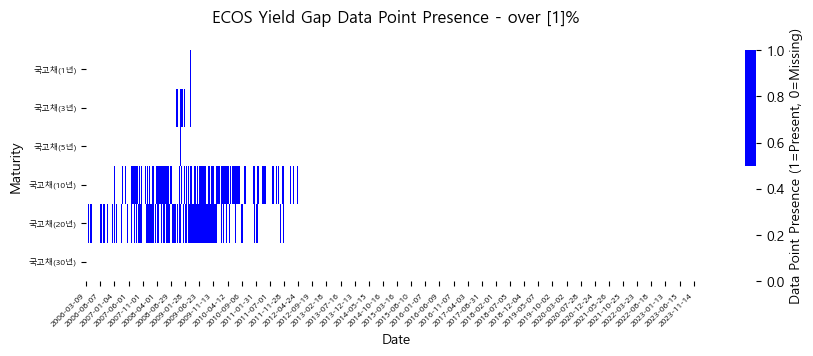

In [133]:
gap_point(yield_gap, dataset_name, 1)

(4476, 6)


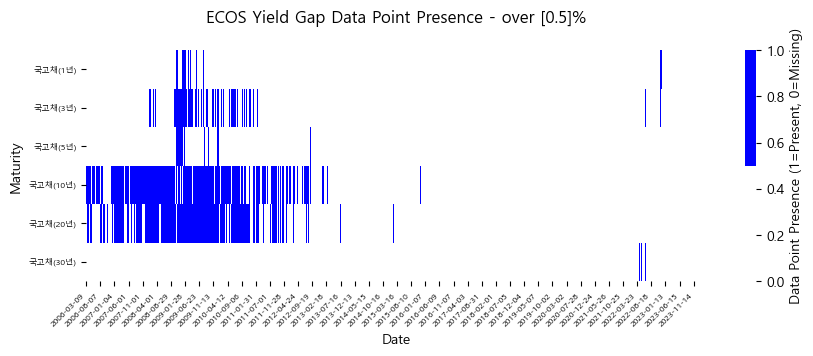

In [134]:
gap_point(yield_gap,dataset_name, 0.5)

(4476, 6)


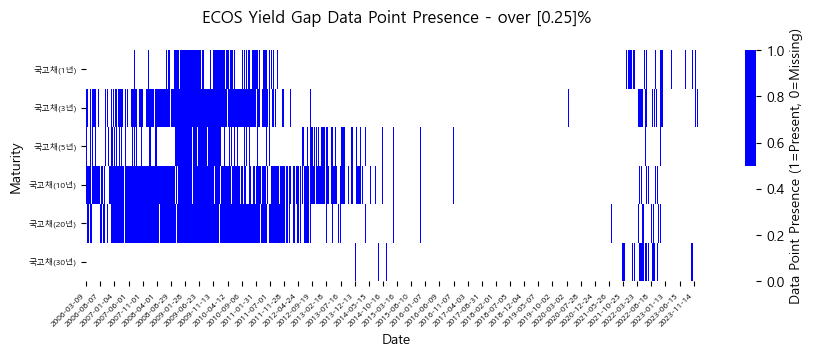

In [135]:
gap_point(yield_gap, dataset_name,0.25)

# Yield Gap - 2. Seibro CD

In [136]:
dataset_name = "Seibro"

In [137]:
seibro = pd.read_csv("data/seibro.csv").drop(columns=["7d", "15d"])
seibro["date"] = pd.to_datetime(seibro["date"], format='%Y%m%d').dt.strftime("%Y-%m-%d")
print(seibro.shape)
seibro.head()

(31120, 11)


,date,credit_rank,1d,10d,1m,2m,3m,4m,6m,1y,2y
0,2010-01-04,AAA,2.18,2.35,2.62,2.80,2.88,3.05,3.48,4.24,4.85
1,2010-01-04,AA+,2.27,2.44,2.71,2.89,2.97,3.13,3.56,4.40,5.01
2,2010-01-04,AA0,2.30,2.46,2.74,2.92,3.01,3.17,3.61,4.45,5.06
3,2010-01-04,AA-,2.35,2.52,2.81,2.99,3.10,3.30,3.76,4.58,5.18
4,2010-01-04,A+,2.39,2.55,2.85,3.03,3.18,3.36,3.82,4.65,5.25


In [138]:
seibro.describe()

,1d,10d,1m,2m,3m,4m,6m,1y,2y
count,31120.000000,31120.000000,31120.000000,31120.000000,31120.000000,31120.000000,31120.000000,31120.000000,31120.000000
mean,2.243403,1.146241,2.369487,2.437485,2.511352,2.570938,2.657594,2.918974,3.204316
std,0.935046,1.392643,0.956434,0.964816,0.983972,0.987516,1.009708,1.095999,1.257082
min,0.470000,0.000000,0.550000,0.590000,0.620000,0.620000,0.670000,0.700000,0.790000
25%,1.520000,0.000000,1.597500,1.660000,1.710000,1.770000,1.840000,2.010000,2.180000
50%,2.120000,0.000000,2.250000,2.320000,2.390000,2.450000,2.520000,2.800000,3.000000
75%,3.090000,2.600000,3.250000,3.330000,3.400000,3.470000,3.590000,3.892500,4.380000
max,3.920000,3.800000,4.270000,4.330000,4.660000,4.880000,5.310000,6.140000,6.660000


In [139]:
seibro.loc[seibro.date==date_range[i]]

,date,credit_rank,1d,10d,1m,2m,3m,4m,6m,1y,2y
29680,2024-03-25,AAA,3.45,0.0,3.57,3.62,3.65,3.65,3.63,3.63,4.02
29681,2024-03-25,AA+,3.48,0.0,3.58,3.65,3.68,3.71,3.71,3.76,4.11
29682,2024-03-25,AA0,3.50,0.0,3.65,3.73,3.77,3.81,3.84,3.97,4.31
29683,2024-03-25,AA-,3.56,0.0,3.72,3.80,3.83,3.88,3.92,4.09,4.46
29684,2024-03-25,A+,3.62,0.0,3.78,3.86,3.90,3.95,3.99,4.16,4.54
29685,2024-03-25,A0,3.67,0.0,3.83,3.92,3.97,4.02,4.06,4.24,4.62
29686,2024-03-25,A-,3.72,0.0,3.88,3.97,4.03,4.08,4.12,4.32,4.69
29687,2024-03-25,BBB,3.80,0.0,4.05,4.14,4.20,4.29,4.33,4.64,5.11


In [140]:
date_range[i]

'2024-03-25'

In [141]:
seibro_index = [1, 10, 30, 60, 91, 121, 182, 365, 730]

is_empty = False

yield_gap = [[None]*len(seibro_index) for _ in range(len(rf_yield_curve))]

for i in range(len(rf_yield_curve)):
    global dataset_name
    x = seibro_index
    y = seibro.loc[seibro.date==date_range[i]].iloc[:, 2:]
    if y.empty: 
        if not is_empty:
            print(f"{dataset_name} Empty ~ Date from {date_range[i]}")
            is_empty = True
        continue
    if is_empty:
        print(f"{dataset_name} Filled ~ Date from {date_range[i]}\n")
        is_empty = False

    y_smooth = rf_yield_curve[i][1](seibro_index)
    y = y.values[0] # only AAA rating is used 
    yield_gap[i] = y - y_smooth

yield_gap = pd.DataFrame(yield_gap, columns=seibro_index)
yield_gap["Date"] = date_range
yield_gap = yield_gap.set_index("Date").dropna(axis=0, how='all')
yield_gap = yield_gap.abs()

yield_gap

Seibro Empty ~ Date from 2006-01-02
Seibro Filled ~ Date from 2010-01-04



,1,10,30,60,91,121,182,365,730
Date,,,,,,,,,
2010-01-04,0.790565,0.644295,0.426472,0.323304,0.320903,0.224279,0.061683,0.429969,0.428759
2010-01-05,0.411189,0.286161,0.114504,0.077930,0.141047,0.104692,0.068010,0.177219,0.093937
2010-01-06,0.937080,0.790082,0.570648,0.465083,0.460232,0.361260,0.070604,0.321121,0.333560
2010-01-07,0.711168,0.569409,0.361486,0.292846,0.285059,0.202191,0.056947,0.363746,0.247501
2010-01-08,0.716881,0.572721,0.359508,0.283057,0.267349,0.176965,0.097011,0.444763,0.394520
...,...,...,...,...,...,...,...,...,...
2024-03-19,0.062894,3.368254,0.209213,0.245460,0.261639,0.267996,0.240754,0.220343,0.575324
2024-03-20,0.082827,3.367803,0.200806,0.248738,0.266626,0.274604,0.250565,0.239004,0.608383
2024-03-21,0.066798,3.393686,0.175245,0.223660,0.252047,0.250509,0.227453,0.218843,0.594108


In [142]:
y, y_smooth

(array([3.45, 0.  , 3.57, 3.62, 3.65, 3.65, 3.63, 3.63, 4.02]),
 array([3.39160057, 3.39202561, 3.39296373, 3.39435434, 3.39577047,
        3.39712083, 3.39980597, 3.40737943, 3.42038148]))

In [143]:
yield_gap[yield_gap.index<="2012-01-01"].describe()

,1,10,30,60,91,121,182,365,730
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.252006,0.206718,0.173083,0.150422,0.139913,0.132376,0.152097,0.317991,0.683619
std,0.187571,0.162915,0.144370,0.132835,0.123158,0.113336,0.116376,0.171235,0.296265
min,0.000152,0.000260,0.000113,0.000097,0.000011,0.000537,0.000960,0.007260,0.006888
25%,0.108551,0.077043,0.060916,0.049948,0.049036,0.046868,0.065431,0.190302,0.465879
50%,0.215223,0.172866,0.140542,0.117195,0.105422,0.107516,0.123503,0.316743,0.677460
75%,0.350308,0.287633,0.240321,0.211524,0.194026,0.180424,0.211633,0.422178,0.932509
max,1.036353,0.877975,0.789713,0.735395,0.677103,0.640077,0.651875,0.854747,1.316590


In [144]:
yield_gap[yield_gap.index>"2012-01-01"].describe()

,1,10,30,60,91,121,182,365,730
count,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000
mean,0.174722,1.211717,0.125012,0.109040,0.105755,0.108475,0.132056,0.190104,0.330919
std,0.228723,1.164327,0.177689,0.159814,0.148972,0.142287,0.140027,0.181789,0.932709
min,0.000127,0.000094,0.000008,0.000031,0.000048,0.000060,0.000126,0.000037,0.000069
25%,0.053069,0.133269,0.039999,0.036561,0.035505,0.039071,0.058231,0.094121,0.123979
50%,0.112509,1.217196,0.084818,0.074163,0.080039,0.083707,0.112240,0.161938,0.266293
75%,0.217107,1.662959,0.160656,0.143360,0.141619,0.148500,0.183264,0.239537,0.428876
max,7.053727,8.306429,6.710036,6.492856,6.272456,6.051106,5.671109,4.580259,49.673551


In [145]:
yield_gap.describe()

,1,10,30,60,91,121,182,365,730
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,0.185709,1.068838,0.131846,0.114923,0.110611,0.111873,0.134905,0.208286,0.381062
std,0.224937,1.135717,0.174136,0.156913,0.146054,0.138778,0.137078,0.185753,0.879696
min,0.000127,0.000094,0.000008,0.000031,0.000011,0.000060,0.000126,0.000037,0.000069
25%,0.057186,0.117709,0.042250,0.037678,0.037723,0.039830,0.058892,0.100669,0.145459
50%,0.122473,0.653783,0.089541,0.078784,0.082982,0.086342,0.113732,0.174912,0.299719
75%,0.239593,1.598237,0.172756,0.152690,0.149689,0.154563,0.187203,0.264880,0.505091
max,7.053727,8.306429,6.710036,6.492856,6.272456,6.051106,5.671109,4.580259,49.673551


(3524, 9)


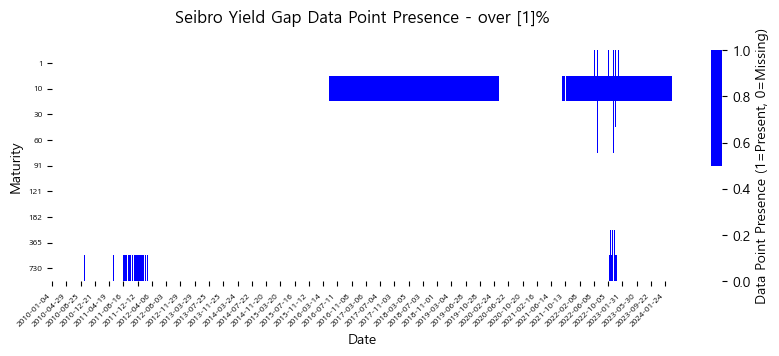

In [146]:
gap_point(yield_gap, dataset_name, 1)

(3524, 9)


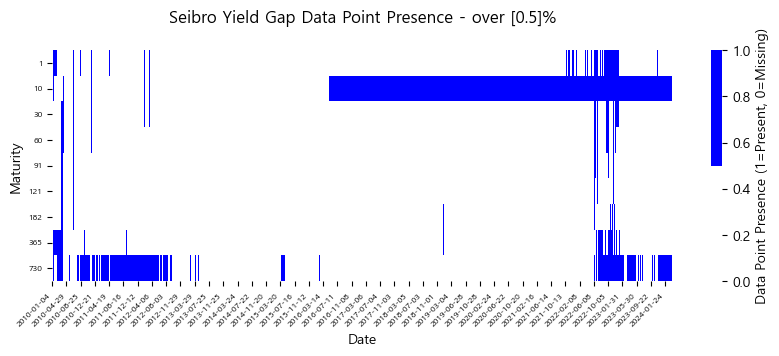

In [147]:
gap_point(yield_gap, dataset_name, 0.5)

(3524, 9)


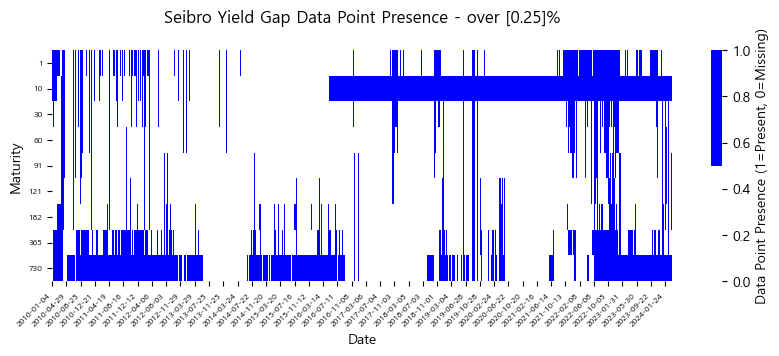

In [148]:
gap_point(yield_gap, dataset_name, 0.25)